# Logistic Regression Hands-On

In [1]:
# let's import few necessary libraries
import numpy as np
import pandas as pd

# now let's import the dataset
data = pd.read_csv("US-pumpkins.csv")
data.sample(5)

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
1692,ST. LOUIS,NaN,36 inch bins,HOWDEN TYPE,NaN,NaN,9/30/16,115.00,115.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
1141,NEW YORK,NaN,36 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,120.00,170.00,120.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
1747,ST. LOUIS,NaN,22 lb cartons,MINIATURE,FLAT TYPE,NaN,9/28/16,14.75,14.75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,ABOUT STEADY.
1008,COLUMBIA,NaN,24 inch bins,MIXED HEIRLOOM VARIETIES,NaN,NaN,10/1/16,200.00,200.00,200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
77,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/8/16,17.00,18.50,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [2]:
data.columns

Index(['City Name', 'Type', 'Package', 'Variety', 'Sub Variety', 'Grade',
       'Date', 'Low Price', 'High Price', 'Mostly Low', 'Mostly High',
       'Origin', 'Origin District', 'Item Size', 'Color', 'Environment',
       'Unit of Sale', 'Quality', 'Condition', 'Appearance', 'Storage', 'Crop',
       'Repack', 'Trans Mode', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [3]:
# select few important columns
columns_to_select = ["City Name", 'Package', 'Variety', 'Origin', 'Item Size', 'Color']
pumpkin = data.loc[:,columns_to_select]
pumpkin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   City Name  1757 non-null   object
 1   Package    1757 non-null   object
 2   Variety    1752 non-null   object
 3   Origin     1754 non-null   object
 4   Item Size  1478 non-null   object
 5   Color      1141 non-null   object
dtypes: object(6)
memory usage: 82.5+ KB


In [4]:
# let's impute the missing values for item size and color
pumpkin['Item Size'].fillna(pumpkin['Item Size'].mode()[0], inplace=True)
pumpkin['Color'].fillna(pumpkin['Color'].mode()[0], inplace=True)
pumpkin.dropna(inplace=True)
pumpkin.sample(5)

,City Name,Package,Variety,Origin,Item Size,Color
1087,LOS ANGELES,36 inch bins,HOWDEN TYPE,CALIFORNIA,lge,ORANGE
1110,LOS ANGELES,24 inch bins,FAIRYTALE,CALIFORNIA,sml,ORANGE
1466,SAN FRANCISCO,36 inch bins,HOWDEN TYPE,CALIFORNIA,med,ORANGE
341,BOSTON,36 inch bins,HOWDEN TYPE,MICHIGAN,lge,ORANGE
643,CHICAGO,36 inch bins,FAIRYTALE,MEXICO,lge,ORANGE


### Let's Visualize

/Users/solo/opt/anaconda3/envs/ml/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


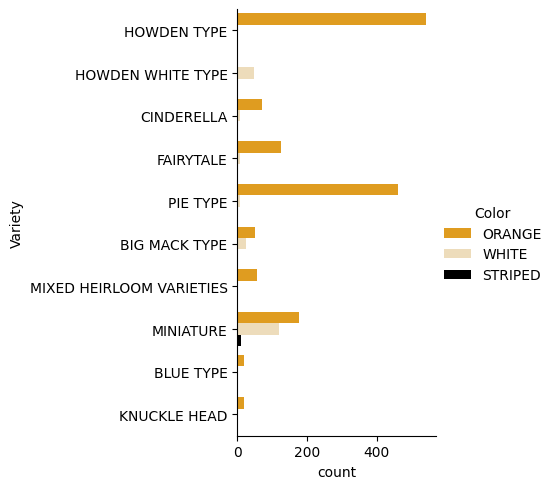

In [5]:
import seaborn as sns
# specify color for each value of hue varibale
palette = {
    'ORANGE': 'orange',
    'WHITE': 'wheat',
    'STRIPED': 'black'
}
# plot to see number of orange vs white for each type of pumpkins
sns.catplot(
    data=pumpkin, y='Variety',
    hue='Color', kind='count',
    palette=palette
)

In [6]:
# let's drop the striped as it is very less in number and then we can do binary classification
pumpkin = pumpkin[pumpkin['Color'] != 'STRIPED']
pumpkin['Color'].unique()

array(['ORANGE', 'WHITE'], dtype=object)

### Data Preprocessing

In [7]:
# let's look at the different size of the pumpkins
pumpkin['Item Size'].unique()

array(['med', 'lge', 'sml', 'xlge', 'med-lge', 'jbo', 'exjbo'],
      dtype=object)

In [8]:
# doing ordinal encoding for size of pumpkins
from sklearn.preprocessing import OrdinalEncoder
item_size_cats = [['med', 'lge', 'sml', 'xlge', 'med-lge', 'jbo', 'exjbo']]
ordinal_features = ['Item Size']
ordinal_encoder = OrdinalEncoder(categories= item_size_cats)

In [9]:
# let's do one hot encoding for few categorical features
from sklearn.preprocessing import OneHotEncoder
onehot_features = ['City Name', 'Package', 'Variety', 'Origin']
onehot_encoder = OneHotEncoder(sparse_output=False)

In [10]:
pumpkin.columns

Index(['City Name', 'Package', 'Variety', 'Origin', 'Item Size', 'Color'], dtype='object')

In [11]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(
    transformers = [
        ('ord', ordinal_encoder, ordinal_features),
        ('cat', onehot_encoder, onehot_features)
    ]
)
ct.set_output(transform='pandas')
encoded_features = ct.fit_transform(pumpkin)
encoded_features.head()

,ord__Item Size,cat__City Name_ATLANTA,cat__City Name_BALTIMORE,cat__City Name_BOSTON,cat__City Name_CHICAGO,cat__City Name_COLUMBIA,cat__City Name_DALLAS,cat__City Name_DETROIT,cat__City Name_LOS ANGELES,cat__City Name_MIAMI,...,cat__Origin_NEW MEXICO,cat__Origin_NEW YORK,cat__Origin_NORTH CAROLINA,cat__Origin_OHIO,cat__Origin_PENNSYLVANIA,cat__Origin_TENNESSEE,cat__Origin_TEXAS,cat__Origin_VERMONT,cat__Origin_VIRGINIA,cat__Origin_WASHINGTON
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
from sklearn.preprocessing import LabelEncoder
# encode 'color' using labelencoder
le = LabelEncoder()
encoded_label = le.fit_transform(pumpkin['Color'])
encoded_pumpkin = encoded_features.assign(Color=encoded_label)
encoded_pumpkin.head()


,ord__Item Size,cat__City Name_ATLANTA,cat__City Name_BALTIMORE,cat__City Name_BOSTON,cat__City Name_CHICAGO,cat__City Name_COLUMBIA,cat__City Name_DALLAS,cat__City Name_DETROIT,cat__City Name_LOS ANGELES,cat__City Name_MIAMI,...,cat__Origin_NEW YORK,cat__Origin_NORTH CAROLINA,cat__Origin_OHIO,cat__Origin_PENNSYLVANIA,cat__Origin_TENNESSEE,cat__Origin_TEXAS,cat__Origin_VERMONT,cat__Origin_VIRGINIA,cat__Origin_WASHINGTON,Color
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [14]:
# check which color was assigned which value of 0 and 1
list(le.inverse_transform([0,1]))

['ORANGE', 'WHITE']

#### Analysis relationships between features and label

In [25]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

/var/folders/v6/z_jg_4k95wb72g2fl3l55f_40000gn/T/ipykernel_32531/3105115225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pumpkin['Item Size'] = encoded_pumpkin['ord__Item Size']


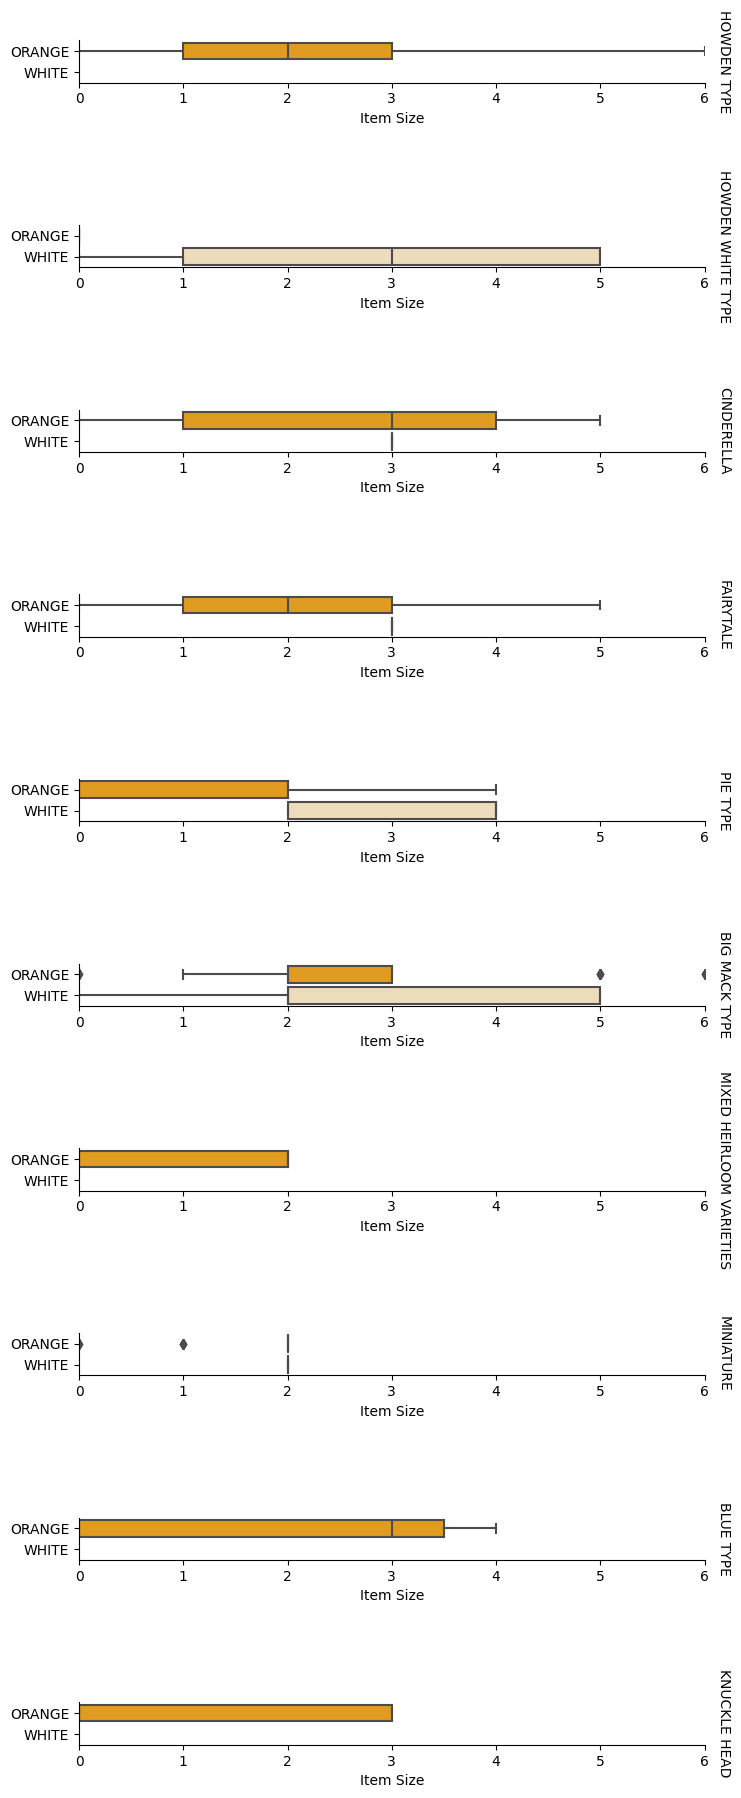

In [26]:
palette = {
    'ORANGE': 'orange',
    'WHITE': 'wheat',
}
# We need the encoded Item Size column to use it as the x-axis values in the plot
pumpkin['Item Size'] = encoded_pumpkin['ord__Item Size']

g = sns.catplot(
    data=pumpkin,
    x="Item Size", y="Color", row='Variety',
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=1.8, aspect=4, palette=palette,
)

# Defining axis labels 
g.set(xlabel="Item Size", ylabel="").set(xlim=(0,6))
g.set_titles(row_template="{row_name}")
g.tight_layout(pad=0)

<Axes: xlabel='Color', ylabel='ord__Item Size'>

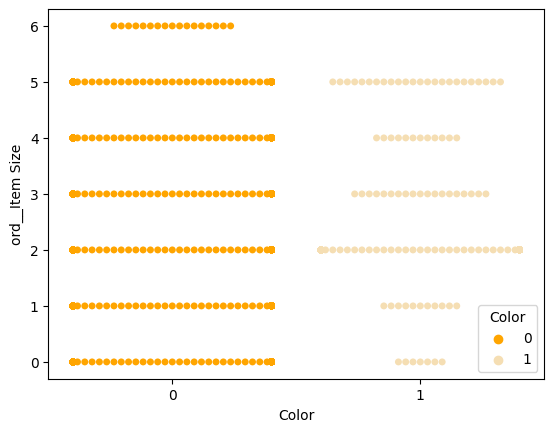

In [27]:
palette = {
    0: 'orange',
    1: 'wheat'
}
sns.swarmplot(x="Color", y="ord__Item Size", hue="Color", data=encoded_pumpkin, palette=palette)

In [36]:
from sklearn.model_selection import train_test_split
# X is the encoded features
X = encoded_pumpkin[encoded_pumpkin.columns.difference(['Color'])]
# y is the encoded label
y = encoded_pumpkin['Color']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
from sklearn.metrics import f1_score, classification_report 
from sklearn.linear_model import LogisticRegression

# Train a logistic regression model on the pumpkin dataset
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluate the model and print the results
print(classification_report(y_test, predictions))
print('F1-score: ', f1_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       306
           1       0.66      0.50      0.57        42

    accuracy                           0.91       348
   macro avg       0.79      0.73      0.76       348
weighted avg       0.90      0.91      0.90       348

F1-score:  0.5675675675675675


In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[295,  11],
       [ 21,  21]])

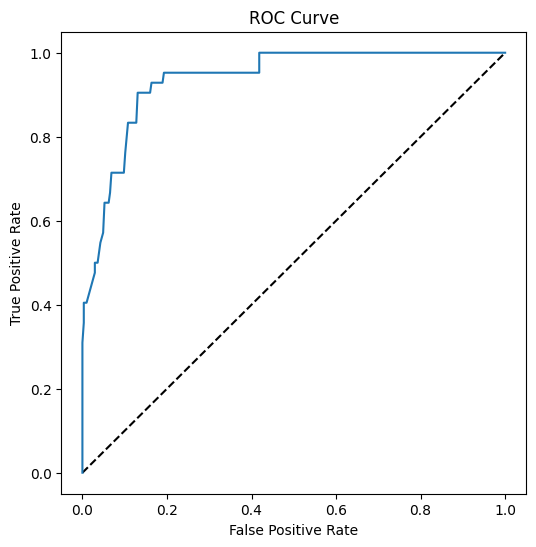

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

y_scores = model.predict_proba(X_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [41]:
# Calculate AUC score
auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)

0.9366246498599439
